In [23]:
import pandas as pd
import numpy as np

In [2]:
cd D:\PROJECTS\ML_Codechef\MiniTask1\Mini-Tasks-20\Shruti_Shreya

D:\PROJECTS\ML_Codechef\MiniTask1\Mini-Tasks-20\Shruti_Shreya


In [3]:
train_file=pd.read_csv("train.csv")
test_file=pd.read_csv("test.csv")

In [5]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline



In [37]:
def chart(feature):
    survived=train_file[train_file['Survived']==1][feature].value_counts()
    dead=train_file[train_file['Survived']==0][feature].value_counts()
    survived.plot(kind='bar')
    

In [31]:
train_file.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

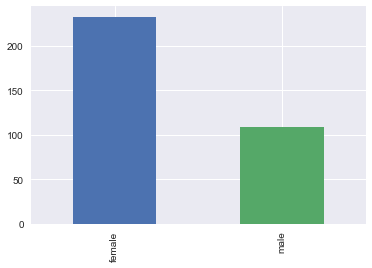

In [38]:
chart('Sex')

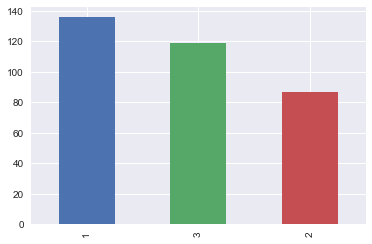

In [39]:
chart('Pclass')

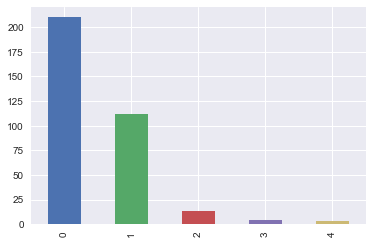

In [40]:
chart('SibSp')

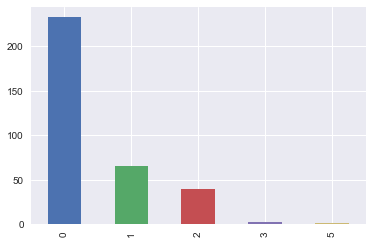

In [41]:
chart('Parch')

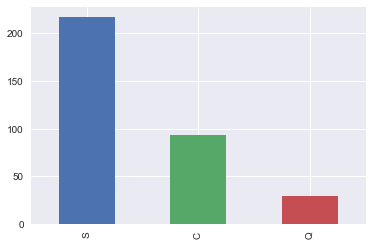

In [42]:
chart('Embarked')

In [45]:
train_file.Sex=train_file.Sex.astype("category")


In [46]:
train_file.Sex=train_file.Sex.cat.codes

In [47]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [49]:
train_file['Embarked']=train_file['Embarked'].astype('category')

In [50]:
train_file['Embarked']=train_file['Embarked'].cat.codes

In [51]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [60]:
test_file.Sex=test_file.Sex.astype("category")


In [61]:
test_file.Sex=test_file.Sex.cat.codes


In [62]:
test_file['Embarked']=test_file['Embarked'].astype("category")

In [63]:
test_file['Embarked']=test_file['Embarked'].cat.codes

In [64]:
test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [66]:
train_test=[train_file,test_file]
for dataset in train_test:
    dataset['Title']=dataset['Name'].str.extract( ' ([A-Za-z]+)\.',expand=False)

In [67]:
train_file['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Ms            1
Jonkheer      1
Lady          1
Mme           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [68]:
test_file['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [72]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,Mr
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0,Mrs


In [74]:
title_map={"Mr":0, "Mrs":1,"Mme":1,"Master":2,"Miss":3,"Ms":3,"Mlle":3, "Dr":4,"Rev":4,"Major":4,"Col":4,"Don":4,"Dona":4,"Countess":4,"Jonkheer":4,"Lady":4,"Sir":4,"Capt":4}
for dataset in train_test:
    dataset['Title']=dataset['Title'].map(title_map)

In [75]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0,1


In [76]:
test_file.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,2,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,1,3
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,2,0


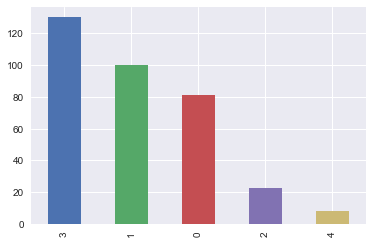

In [77]:
chart('Title')

In [78]:
train_file['Age'].fillna(train_file.groupby('Title')['Age'].transform("median"), inplace=True)
test_file['Age'].fillna(test_file.groupby('Title')['Age'].transform("median"), inplace=True)


In [80]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [81]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [82]:
train_file['Fare'].fillna(train_file.groupby('Pclass')['Fare'].transform("median"), inplace=True)
test_file['Fare'].fillna(test_file.groupby('Pclass')['Fare'].transform("median"), inplace=True)


In [83]:
test_file.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [84]:
train_file['FamilySize']=train_file['SibSp']+train_file['Parch']+1
test_file['FamilySize']=test_file['SibSp']+test_file['Parch']+1

In [85]:
train_file.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,0,1
5,6,0,3,"Moran, Mr. James",1,30.0,0,0,330877,8.4583,NaN,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,2,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,2,2,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,2,1,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,0,1,2


In [86]:
test_file=test_file.drop(['Name','Ticket','Cabin','SibSp','Parch'],axis=1)

In [90]:
train_file=train_file.drop(['Name','Ticket','Cabin','SibSp','Parch'],axis=1)

KeyError: "labels ['Name' 'Ticket' 'Cabin' 'SibSp' 'Parch'] not contained in axis"

In [93]:
train_file=train_file.drop(['PassengerId'],axis=1)
test_file=test_file.drop(['PassengerId'],axis=1)

In [98]:
target=train_file['Survived']
train_file=train_file.drop('Survived',axis=1)

In [102]:
train_file.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,1,22.0,7.2500,2,0,2
1,1,0,38.0,71.2833,0,1,2
2,3,1,26.0,7.9250,2,3,1
3,1,1,35.0,53.1000,2,1,2
4,3,0,35.0,8.0500,2,0,1
